In [2]:
import pandas as pd
import numpy as np
import time, os

In [3]:
defaults = pd.read_csv('../../rawdata/weather/weather.defaults')
defaults = defaults.columns.values

def removeErrorValues(row):
    
    if( (row > 30 and str(row) in defaults) or (row == 999.0) ):
        return np.nan
    else:
        return row

In [4]:
for i in defaults:
    print(i)

NONE
NONE.1
NONE.2
NONE.3
NONE.4
NONE.5
NONE.6
NONE.7
999
9
9.1
999.9
9.2
99999
9.3
9.4
9.5
NONE.8
9.6
9.7
9.8
999.9.1
NONE.9
999.9.2
9.9
9999.9
9.10
99
999.9.3
9.11
9.12
99.1
999.9.4
9.13
9.14
99.2
999.9.5
9.15
9.16
99.3
999.9.6
9.17
9.18
9999.9.1
9.19
NONE.10
9.20
9.21
9.22
9999.9.2
9.23
9999
9999.1
9999.2
9.24
99.4
9.25
99.5
9.26
99.6
9.27
99.7
9.28
9.29
999.1
999.2
999.9.7
9.30
999999
9.31
999.3
999.9.8
9.32
999999.1
9.33
999.4
999.9.9
9.34
999999.2
9.35
999.5
999.9.10
9.36
999999.3
9.37
999.6
999.9.11
9.38
999999.4
9.39
999.7
999.9.12
9.40
999999.5
9.41
999.8
999.9.13
9.42
999999.6
9.43
999.9.14
999.9.15
9.44
999999.7
9.45
999.10
999.9.16
9.46
999999.8
9.47
999.11
999.9.17
9.48
999999.9
9.49
999.12
999.9.18
9.50
999999.10
9.51
999.13
999.9.19
9.52
999999.11
9.53
9999.3
9.54
9.55
99999.9
9.56
9.57
9999.4
9.58
99.8
9.59
99.9
999.14
9.60
9.61
99.10
999.15
9.62
9.63
99.11
999.16
9.64
9.65
99.12
999.17
9.66
9.67
999.9.20
9.68
9999.5
9999.6
9999.7
9.69
999.18
999.9.21
9.70
9.71
99.13
99

In [5]:
cols=[0,11, 21, 28, 135, 136, 137, 138,  139, 140, 143, 144, 147, 148] 
p='%Y-%m-%d %H:%M:%S'

# weatherDFrame_header = pd.read_csv('../../rawdata/weather/weather.header')
weatherDFrame_header = pd.read_csv('../../rawdata/weather/weather.header', usecols = cols)
weatherDFrame = pd.read_csv('../../rawdata/weather/weather', usecols = cols, names=weatherDFrame_header.columns.values)

weatherDFrame['datetime'] = pd.to_datetime(weatherDFrame['time'],unit='s')
weatherDFrame['datetime'].dt.tz_localize('utc').dt.tz_convert('US/Eastern')

weatherDFrame.sort_values(by=['datetime'], inplace=True)
weatherDFrame.set_index(['datetime'], inplace = True)
weatherDFrame.drop(['time'], axis=1, inplace=True)

In [6]:
weatherDFrame.tail()

,Spd[Wind],Temp[Temp],Amt[PrecipHourly1],Pr[Snowfall],Amt[Snowfall],I[Snowfall],Q[Snowfall],Pr[Snowfall2],Amt[Snowfall2],Pr[Snowfall3],Amt[Snowfall3],Pr[Snowfall4],Amt[Snowfall4]
datetime,,,,,,,,,,,,,
2018-04-01 21:51:00,7.7,13.3,0.0,99,999,9,9,99,999,99,999,99,999
2018-04-01 22:00:00,7.7,13.3,999.9,99,999,9,9,99,999,99,999,99,999
2018-04-01 22:51:00,7.2,12.2,0.0,99,999,9,9,99,999,99,999,99,999
2018-04-01 23:51:00,6.7,12.2,0.0,99,999,9,9,99,999,99,999,99,999
2018-04-02 00:51:00,7.2,10.0,0.0,99,999,9,9,99,999,99,999,99,999


In [7]:
### cleaning default values
weatherDFrame['Spd[Wind]'] = weatherDFrame.apply(lambda row: removeErrorValues(row['Spd[Wind]']), axis=1)
weatherDFrame['Amt[PrecipHourly1]'] = weatherDFrame.apply(lambda row: removeErrorValues(row['Amt[PrecipHourly1]']), axis=1)
weatherDFrame['Temp[Temp]'] = weatherDFrame.apply(lambda row: removeErrorValues(row['Temp[Temp]']), axis=1)
# weatherDFrame['Amt[Snowfall]'] = weatherDFrame.apply(lambda row: removeErrorValues(row['Amt[Snowfall]']), axis=1)

In [8]:
weatherDFrame['Spd[Wind]'] = weatherDFrame['Spd[Wind]'].fillna(weatherDFrame['Spd[Wind]'].shift())
weatherDFrame['Amt[PrecipHourly1]'] = weatherDFrame['Amt[PrecipHourly1]'].fillna(0)
weatherDFrame['Temp[Temp]'] = weatherDFrame['Temp[Temp]'].fillna((weatherDFrame['Temp[Temp]'].shift() + weatherDFrame['Temp[Temp]'].shift(-1))/2)

In [9]:
precipitation = weatherDFrame[['Amt[PrecipHourly1]']]
precipitation = precipitation.resample('H').agg({'Amt[PrecipHourly1]': 'mean'})
precipitation = precipitation.reset_index()
precipitation['datetime'] = (precipitation['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
precipitation.set_index('datetime', inplace=True)
precipitation = precipitation.loc[1388552400:1451624399]

wind = weatherDFrame[['Spd[Wind]']]
wind = wind.resample('H').agg({'Spd[Wind]': 'mean'})
wind = wind.reset_index()
wind['datetime'] = (wind['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
wind.set_index('datetime', inplace=True)
wind = wind.loc[1388552400:1451624399]


# snowfall = weatherDFrame[['Amt[Snowfall]']]
# snowfall = snowfall.resample('H').agg({'Amt[Snowfall]': 'sum'})
# snowfall = snowfall.reset_index()
# snowfall['datetime'] = (snowfall['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
# snowfall.set_index('datetime', inplace=True)
# snowfall = snowfall.loc[1388552400:1451624399]
# snowfall = snowfall['2014-01-01':'2016-01-01']


temp = weatherDFrame[['Temp[Temp]']]
temp = temp.resample('H').agg({'Temp[Temp]': 'mean'})
temp = temp.reset_index()
temp['datetime'] = (temp['datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
temp.set_index('datetime', inplace=True)
temp = temp.loc[1388552400:1451624399]
# temp = temp['2014-01-01':'2016-01-01']

# snowfall.to_csv('../../data/weather/snowfall.csv')
precipitation.to_csv('../../data/weather/precipitation.csv', index=False)
wind.to_csv('../../data/weather/wind.csv', index=False)
temp.to_csv('../../data/weather/temperature.csv', index=False)

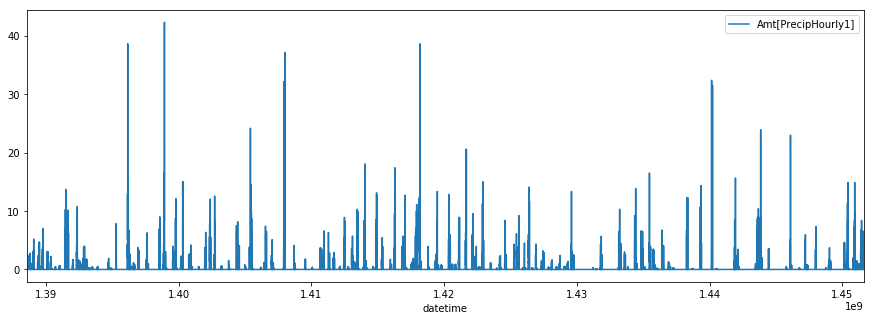

In [14]:
# snowfall = weatherDFrame[['Q[Snowfall]']]
# snowfall[snowfall['Q[Snowfall]'] < 90]['2014-01-01':'2016-01-01']

# snowfall[ (snowfall['Amt[Snowfall]'] > 0) & (snowfall['Amt[Snowfall]'] < 99)]
precipitation = precipitation.plot(figsize=(15,5))
# wind_plot.show()